
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2> Assignment Script  | Regression Analysis Modeling</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Chase Kusterer - Faculty of Analytics<br>
Student - Oyindamola Iwalehin (MiaMi)<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br>

<br><br>
<h2>Purpose of this Script and Analytical Objectives</h2><br>
This is an analytics Python script designed to identify the best predictive regression modeling for Apprentice Chef, Inc., a popular learning dataset from Kaggle. The objective is to make a prediction for the most effective customer data on the continuous variable of REVENUE and identify the key features that impact REVENUE. The data has 46 null values in the "FAMILY_NAME" column, and after cleaning the data, a regression model was employed to investigate the relationship between independent variables and revenue using Ordinary Least Squares (OLS). The model's predictors are good at predicting revenue based on the R-squared and Adjusted R-squared values, while the coefficients of the intercept and predictor variables show the relationship between each variable and revenue. Some independent variables may not be significant predictors of revenue, suggesting the need to remove these variables from the model. Histograms are developed for different variables to help the author visualize the distribution of each variable and identify potential outliers or unusual patterns in the data. The log-transform is used to transform data to follow a normal distribution, and a correlation matrix is developed to identify the most important continuous features that are strongly correlated with the log_REVENUE feature. Overall, the regression model can provide valuable insights into the relationship between the independent variables and revenue to help Apprentice Chef Inc make data-driven business decisions.
<br>

<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [1]:
# importing datetime to ensure the timely execution of the code

from datetime import datetime

# start by counting the time

startTime = datetime.now()


In [2]:
# importing critical libraries
import pandas            as pd                 # data science essentials
import matplotlib.pyplot as plt                # data visualization
import seaborn           as sns                # enhanced data viz
import statsmodels.formula.api as smf          # regression modeling
import numpy as np                             # mathematical essentials

# importing machine learning models
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm
from sklearn.model_selection import GridSearchCV


# importing machine learning tools
from sklearn.model_selection import train_test_split # train-test split
from sklearn.tree import plot_tree                   # tree plots
import sklearn


# loading data
file = './data/Apprentice_Chef_Dataset_2023.xlsx'


# reading the file into Python
ChefData= pd.read_excel(file)



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
ChefData.head(n = 5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


The author is starting a data analysis project and is importing essential libraries for data processing, visualization, and machine learning. Specifically, the author is importing pandas, matplotlib, seaborn, statsmodels, numpy, and scikit-learn (sklearn) modules. Then, the author imports specific machine learning models such as decision tree, random forest, and gradient boosting, as well as GridSearchCV, which helps to optimize hyperparameters for models. Additionally, the author imports other machine learning tools, such as train_test_split and plot_tree.

After importing the necessary libraries and modules, the author reads in a dataset using pd.read_excel(), specifying the location of the file. The author then sets print options for pandas to display more rows and columns and a wider display width. Finally, the author displays the first five rows of the dataset using .head() function to get an initial glimpse of the data.

In [3]:
# descriptive statistics for numeric data
ChefData.describe(include = 'number').round(2)


,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15
std,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15
min,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00
25%,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00
50%,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00
75%,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00
max,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00


Above, the author is using the describe() method on the ChefData dataframe to generate descriptive statistics for the columns that contain numeric data.

The include parameter is set to 'number', which tells the method to only consider columns with numeric data (i.e. integers and floats). The .round(2) method is used to round the numbers to two decimal places.

In [4]:
# taking the ChefData dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column
ChefData.isnull().sum(axis = 0)

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

We discovered the dataset has 46 null values in "FAMILY_NAME" colomn. There could be several reasons why the "FAMILY_NAME" column might have missing values:

Hence, we are Assuming the following:
    
   The customers may have chosen not to provide their family name during the registration or order process, or the company may not have collected this information at all.

   The customers may have made a mistake or typo while providing their family name, resulting in missing values.

   The data may have been lost or corrupted during the collection or transfer process, resulting in missing values.

   It is also possible that the missing values are due to some kind of technical issue with the database or data collection process, such as an error in the data entry or storage process.

Overall, the reason for the missing values in the "FAMILY_NAME" column is not clear without more information about the data collection process and the context in which it was collected. 
However, we know missing values can affect the validity and reliability of the data analysis and should be carefully considered when interpreting the results, so we decided to clean the data and make it good enough for this analysis.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4> the code below is to flag missing values.</h4><br>


In [5]:
 #instantiating an imputation value
fill = 0


# imputing 'FAMILY_NAME'
ChefData['FAMILY_NAME'] = ChefData['FAMILY_NAME'].fillna(fill)

In [6]:
for col in ChefData:
    print(col)

REVENUE
NAME
EMAIL
FIRST_NAME
FAMILY_NAME
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
AVG_TIME_PER_SITE_VISIT
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
LATE_DELIVERIES 
AVG_PREP_VID_TIME
LARGEST_ORDER_SIZE
AVG_MEAN_RATING
TOTAL_PHOTOS_VIEWED


In [7]:
ChefData.isnull().sum(axis = 0)

REVENUE                        0
NAME                           0
EMAIL                          0
FIRST_NAME                     0
FAMILY_NAME                    0
TOTAL_MEALS_ORDERED            0
UNIQUE_MEALS_PURCH             0
CONTACTS_W_CUSTOMER_SERVICE    0
PRODUCT_CATEGORIES_VIEWED      0
AVG_TIME_PER_SITE_VISIT        0
CANCELLATIONS_AFTER_NOON       0
PC_LOGINS                      0
MOBILE_LOGINS                  0
WEEKLY_PLAN                    0
LATE_DELIVERIES                0
AVG_PREP_VID_TIME              0
LARGEST_ORDER_SIZE             0
AVG_MEAN_RATING                0
TOTAL_PHOTOS_VIEWED            0
dtype: int64

Successfully cleaned ChefData using Fillna for more effective analytic process. As we can see, we no longer have null values in our data set

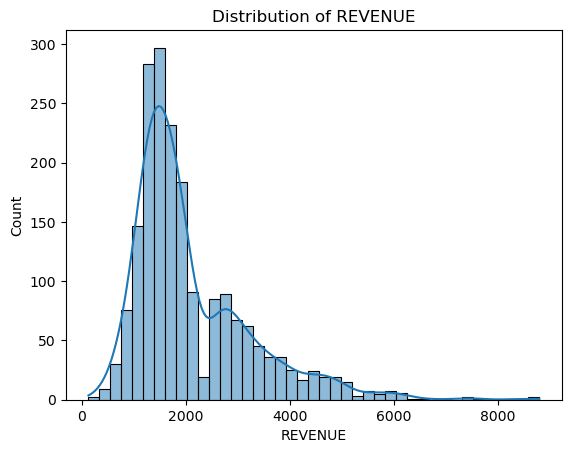

In [8]:
# displaying the plot for 'REVENUE'
sns.histplot(x = 'REVENUE',
            data = ChefData,
            kde = True)


# title and labels
plt.title('Distribution of REVENUE')


# displaying the plot
plt.show()

In [9]:
# log transforming REVENUE and saving it to the dataset
ChefData['log_REVENUE'] = np.log(ChefData['REVENUE'])

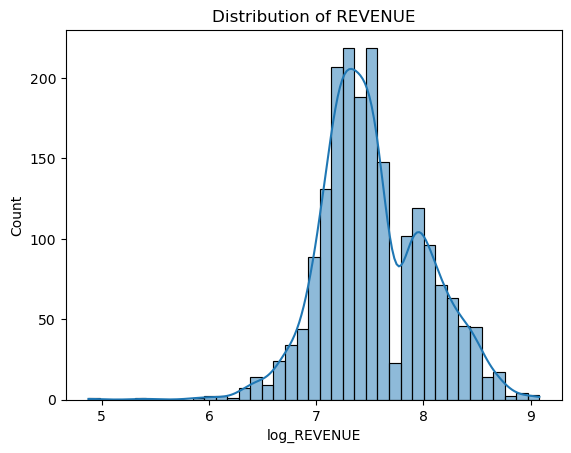

In [10]:
# displaying the plot for 'REVENUE'
sns.histplot(x = 'log_REVENUE',
            data = ChefData,
            kde = True)


# title and labels
plt.title('Distribution of REVENUE')


# displaying the plot
plt.show()

In [11]:
# creating a list of continuous features (including REVENUE)
continuous_data =                    ['REVENUE',
                                      'UNIQUE_MEALS_PURCH', 
                                      'CONTACTS_W_CUSTOMER_SERVICE', 
                                      'AVG_TIME_PER_SITE_VISIT',
                                      'MOBILE_LOGINS', 
                                      'LARGEST_ORDER_SIZE', 
                                      'AVG_MEAN_RATING',
                                      'TOTAL_PHOTOS_VIEWED', 
                                      'WEEKLY_PLAN', 
                                      'CANCELLATIONS_AFTER_NOON',
                                      'AVG_PREP_VID_TIME',
                                      'PRODUCT_CATEGORIES_VIEWED', 
                                      'PC_LOGINS' ]


# developing a correlation matrix based on continuous features
ChefData_corr = ChefData[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
ChefData_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                        1.00
AVG_TIME_PER_SITE_VISIT        0.64
TOTAL_PHOTOS_VIEWED            0.46
LARGEST_ORDER_SIZE             0.44
CONTACTS_W_CUSTOMER_SERVICE    0.17
AVG_PREP_VID_TIME              0.14
UNIQUE_MEALS_PURCH             0.10
MOBILE_LOGINS                  0.07
PRODUCT_CATEGORIES_VIEWED      0.03
PC_LOGINS                      0.02
WEEKLY_PLAN                    0.01
CANCELLATIONS_AFTER_NOON       0.00
AVG_MEAN_RATING               -0.55
Name: REVENUE, dtype: float64

In [12]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """REVENUE ~ UNIQUE_MEALS_PURCH+
                                       CONTACTS_W_CUSTOMER_SERVICE+
                                       PRODUCT_CATEGORIES_VIEWED+
                                       AVG_TIME_PER_SITE_VISIT+
                                       CANCELLATIONS_AFTER_NOON+
                                       PC_LOGINS+
                                       MOBILE_LOGINS+
                                       WEEKLY_PLAN+
                                       AVG_PREP_VID_TIME+
                                       LARGEST_ORDER_SIZE+
                                       AVG_MEAN_RATING+
                                       TOTAL_PHOTOS_VIEWED""",
                      data = ChefData)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     208.5
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        03:42:00   Log-Likelihood:                -15647.
No. Observations:                1946   AIC:                         3.132e+04
Df Residuals:                    1933   BIC:                         3.139e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

A regression model was used to investigate the relationship between various independent variables and the dependent variable, revenue. The model employed Ordinary Least Squares (OLS), a method for estimating the linear relationship between the independent variables and the dependent variable.

Based on the R-squared value of 0.564 and the Adjusted R-squared value of 0.561, the model's predictors are good at predicting revenue. The F-statistic of 208.5 also shows that the overall model is statistically significant, with a probability value of 0.00.

The coefficients of the intercept and the predictor variables show the relationship between each variable and revenue. For example, a one-unit increase in 'UNIQUE_MEALS_PURCH' results in an expected revenue increase of $25.82, holding all other variables constant.

some independent variables, such as PRODUCT_CATEGORIES_VIEWED, CANCELLATIONS_AFTER_NOON, PC_LOGINS, WEEKLY_PLAN, and AVG_PREP_VID_TIME, have P-values greater than 0.05, which suggests that they may not be significant predictors of revenue. Therefore, it might be beneficial to remove these variables from the model.

Overall, the regression model results can provide valuable insights into the relationship between the independent variables and revenue, which may help Apprentice Chef Inc make data-driven business decisions. Nevertheless, the presence of insignificant variables and possible multicollinearity may affect the model's accuracy, and further investigation is needed to improve models accuracy.



In [13]:
# creating a list of continuous features (including REVENUE)
continuous_data =                               ['REVENUE',
                                                 'UNIQUE_MEALS_PURCH', 
                                                'CONTACTS_W_CUSTOMER_SERVICE',
                                                'AVG_TIME_PER_SITE_VISIT',
                                                'MOBILE_LOGINS',
                                                'LARGEST_ORDER_SIZE',
                                                'AVG_MEAN_RATING',
                                                'TOTAL_PHOTOS_VIEWED']


# developing a correlation matrix based on continuous features
ChefData_corr = ChefData[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
ChefData_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                        1.00
AVG_TIME_PER_SITE_VISIT        0.64
TOTAL_PHOTOS_VIEWED            0.46
LARGEST_ORDER_SIZE             0.44
CONTACTS_W_CUSTOMER_SERVICE    0.17
UNIQUE_MEALS_PURCH             0.10
MOBILE_LOGINS                  0.07
AVG_MEAN_RATING               -0.55
Name: REVENUE, dtype: float64

Above, The author is creating a list called continuous_data that includes the variable REVENUE and several other continuous variables that may be relevant to predicting REVENUE. Then, they are developing a correlation matrix based on the continuous_data list using the corr() function with a Pearson correlation method. The correlation matrix will show the pairwise correlations between all continuous variables, including REVENUE. Finally, the author is filtering the correlation matrix to show only the correlations between REVENUE and other variables by selecting the REVENUE column and rounding the values to two decimals. The sort_values() function is used to sort the correlations in descending order.

In [14]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """REVENUE ~ UNIQUE_MEALS_PURCH+
                                      CONTACTS_W_CUSTOMER_SERVICE+
                                      AVG_TIME_PER_SITE_VISIT+
                                      MOBILE_LOGINS+
                                      LARGEST_ORDER_SIZE+
                                      AVG_MEAN_RATING+
                                      TOTAL_PHOTOS_VIEWED""",
                                      data = ChefData)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     357.3
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        03:42:00   Log-Likelihood:                -15649.
No. Observations:                1946   AIC:                         3.131e+04
Df Residuals:                    1938   BIC:                         3.136e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

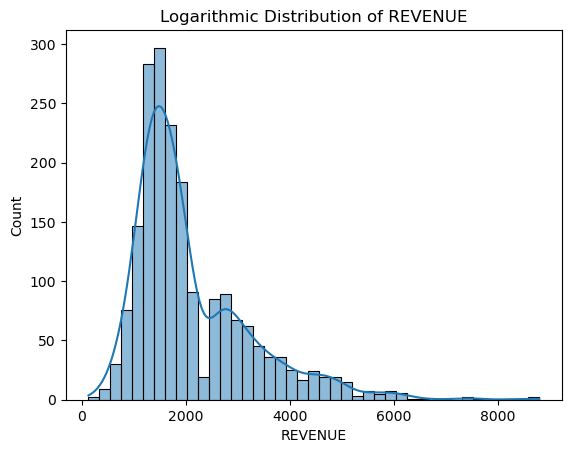

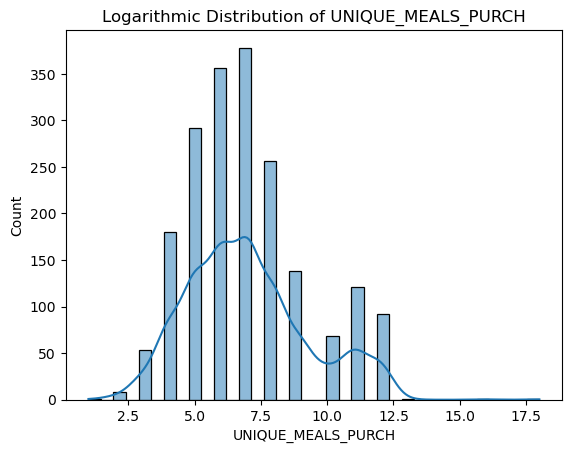

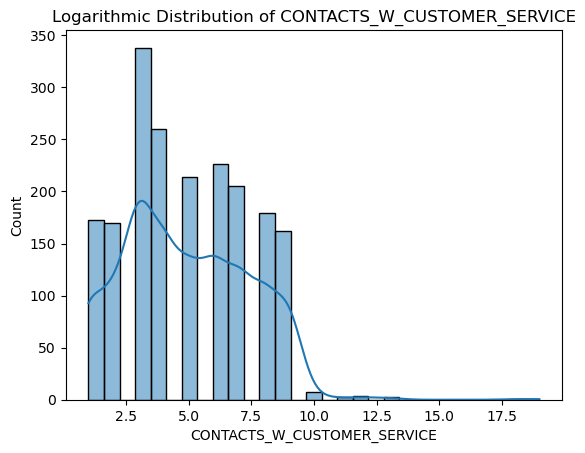

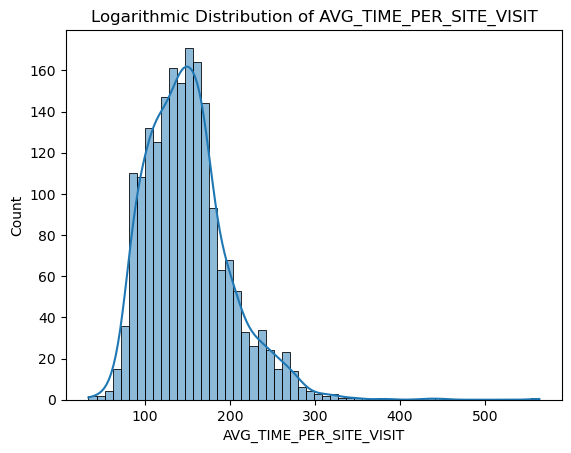

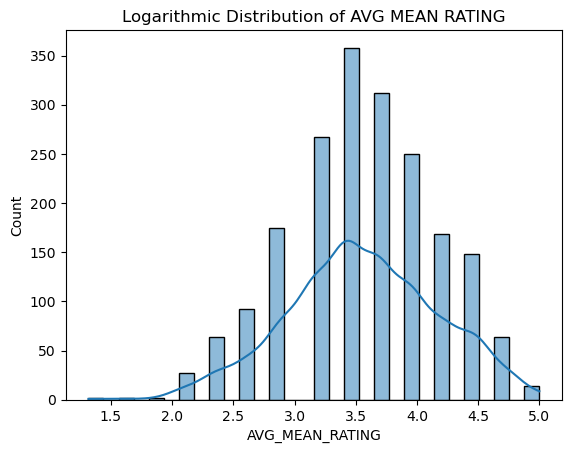

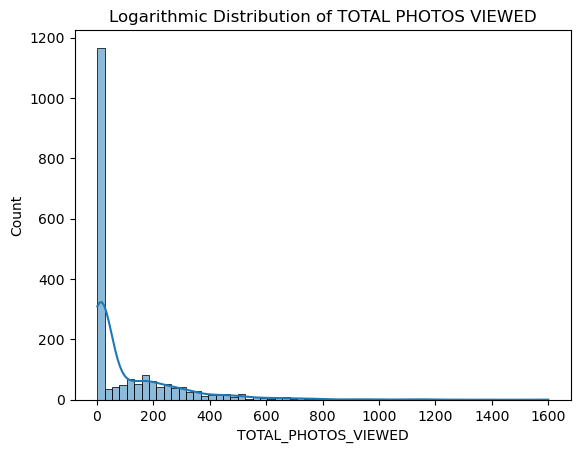

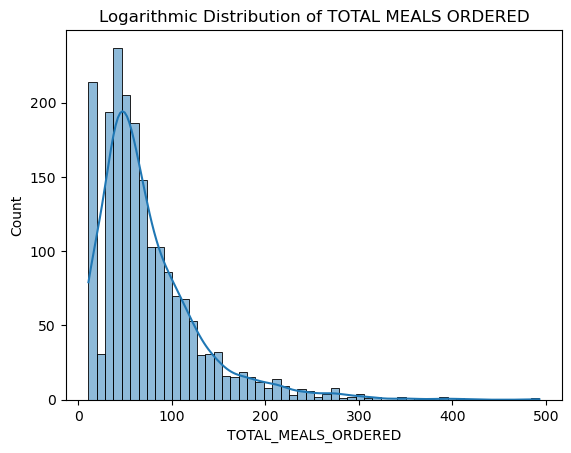

In [15]:
# developing a histogram using HISTPLOT
sns.histplot(data   = ChefData,
             x      = 'REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of REVENUE")
plt.xlabel(xlabel = "REVENUE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()






# developing a histogram using HISTPLOT
sns.histplot(data   = ChefData,
             x      = 'UNIQUE_MEALS_PURCH',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of UNIQUE_MEALS_PURCH")
plt.xlabel(xlabel = "UNIQUE_MEALS_PURCH") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()







# developing a histogram using HISTPLOT
sns.histplot(data   = ChefData,
             x      = 'CONTACTS_W_CUSTOMER_SERVICE',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of CONTACTS_W_CUSTOMER_SERVICE")
plt.xlabel(xlabel = "CONTACTS_W_CUSTOMER_SERVICE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = ChefData,
             x      = 'AVG_TIME_PER_SITE_VISIT',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of AVG_TIME_PER_SITE_VISIT")
plt.xlabel(xlabel = "AVG_TIME_PER_SITE_VISIT") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = ChefData,
             x      = 'AVG_MEAN_RATING',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of AVG MEAN RATING")
plt.xlabel(xlabel = "AVG_MEAN_RATING") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = ChefData,
             x      = 'TOTAL_PHOTOS_VIEWED',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of TOTAL PHOTOS VIEWED")
plt.xlabel(xlabel = "TOTAL_PHOTOS_VIEWED") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = ChefData,
             x      = 'TOTAL_MEALS_ORDERED',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of TOTAL MEALS ORDERED")
plt.xlabel(xlabel = "TOTAL_MEALS_ORDERED") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In this code, the author is developing histograms for different variables in the dataset. For each histogram, the x-axis shows the values of the variable, and the y-axis shows the count of occurrences for each value. The author has also added a kernel density estimate (kde) to each plot to show the estimated probability density function of the variable.

After developing each histogram, the author has added a title and axis labels to the plot. The titles describe the variable being plotted, and the axis labels show the name of the variable being plotted.

Overall, the histograms help the author to visualize the distribution of each variable and identify any potential outliers or unusual patterns in the data.

Author is not satisfied with the skewness of the plot, hence, a need to log the variable in order to get a normal distribution

In [16]:
# log transforming Sale_Price and saving it to the dataset
ChefData['log_REVENUE'] = np.log(ChefData['REVENUE'])

# log transforming Sale_Price and saving it to the dataset
ChefData['log_UNIQUE_MEALS_PURCH'] = np.log(ChefData['UNIQUE_MEALS_PURCH'])

# log transforming Sale_Price and saving it to the dataset
ChefData['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log(ChefData['CONTACTS_W_CUSTOMER_SERVICE'])

# log transforming Sale_Price and saving it to the dataset
ChefData['log_AVG_TIME_PER_SITE_VISIT'] = np.log(ChefData['AVG_TIME_PER_SITE_VISIT'])

# log transforming Sale_Price and saving it to the dataset
ChefData['log_AVG_MEAN_RATING'] = np.log(ChefData['AVG_MEAN_RATING'])

# log transforming Sale_Price and saving it to the dataset
ChefData['log_TOTAL_PHOTOS_VIEWED'] = np.log(ChefData['TOTAL_PHOTOS_VIEWED'])

# log transforming Sale_Price and saving it to the dataset
ChefData['log_TOTAL_MEALS_ORDERED'] = np.log(ChefData['TOTAL_MEALS_ORDERED'])

This code block provides the log-transform specific columns in the ChefData dataframe and save the transformed columns back to the dataframe. The transformation is useful when the data is not normally distributed and it helps to transform the data to follow a normal distribution, which can be useful in statistical modeling.

The specific columns that are transformed are:

    UNIQUE_MEALS_PURCH
    CONTACTS_W_CUSTOMER_SERVICE
    AVG_TIME_PER_SITE_VISIT
    AVG_MEAN_RATING
    TOTAL_PHOTOS_VIEWED
    TOTAL_MEALS_ORDERED

The transformed columns are saved with a prefix "log_" to the original column names.


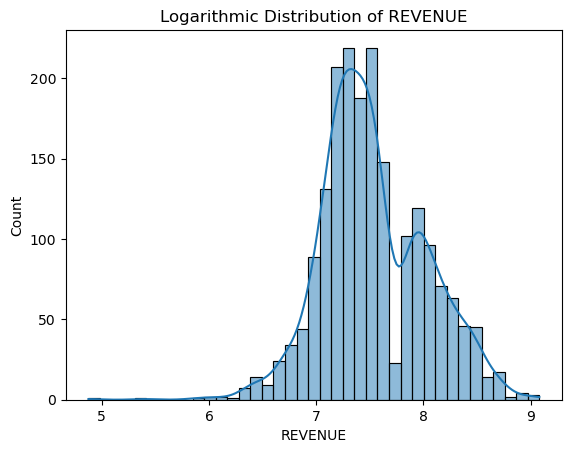

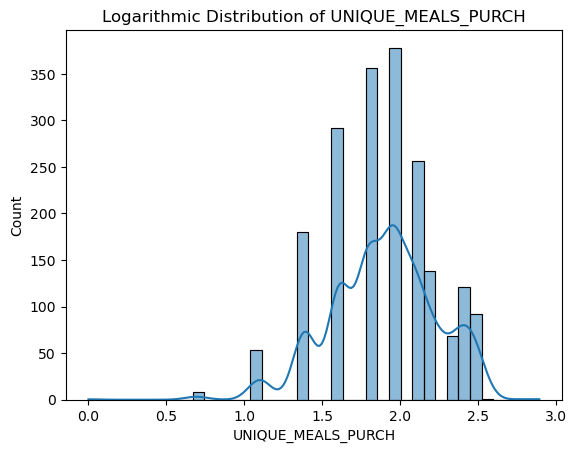

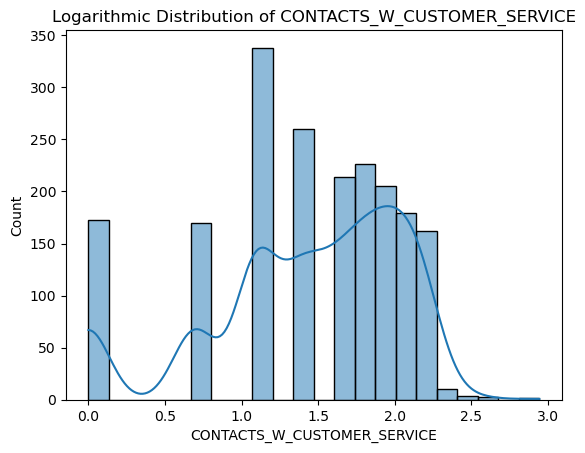

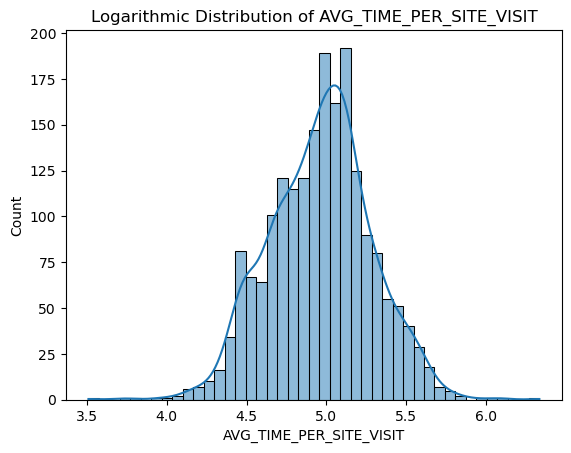

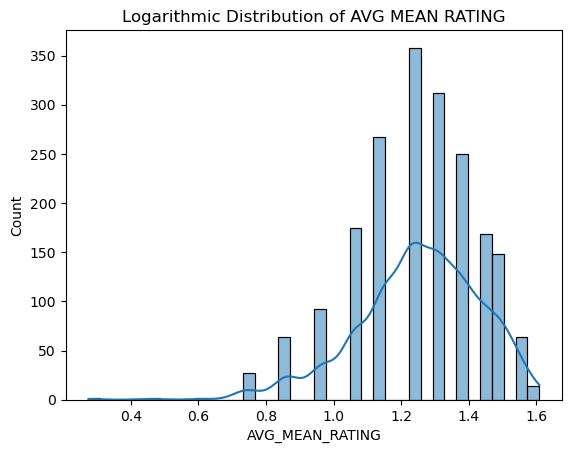

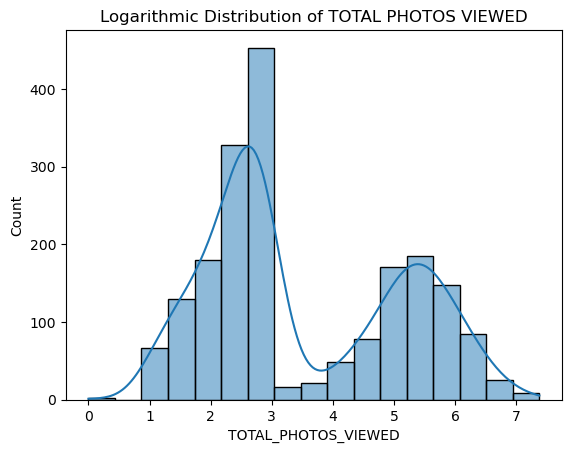

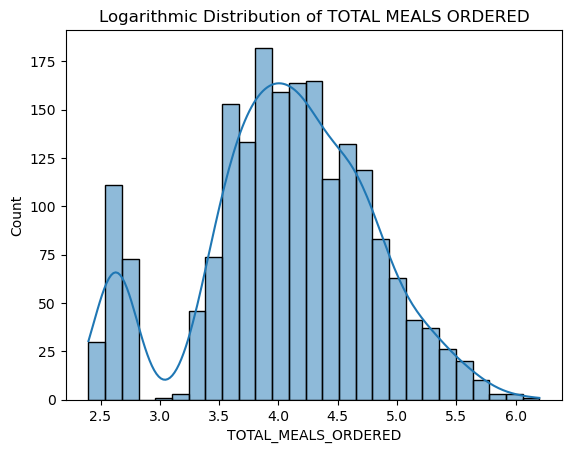

In [17]:
# developing a histogram using HISTPLOT
sns.histplot(data   = ChefData,
             x      = 'log_REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of REVENUE")
plt.xlabel(xlabel = "REVENUE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()






# developing a histogram using HISTPLOT
sns.histplot(data   = ChefData,
             x      = 'log_UNIQUE_MEALS_PURCH',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of UNIQUE_MEALS_PURCH")
plt.xlabel(xlabel = "UNIQUE_MEALS_PURCH") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()







# developing a histogram using HISTPLOT
sns.histplot(data   = ChefData,
             x      = 'log_CONTACTS_W_CUSTOMER_SERVICE',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of CONTACTS_W_CUSTOMER_SERVICE")
plt.xlabel(xlabel = "CONTACTS_W_CUSTOMER_SERVICE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = ChefData,
             x      = 'log_AVG_TIME_PER_SITE_VISIT',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of AVG_TIME_PER_SITE_VISIT")
plt.xlabel(xlabel = "AVG_TIME_PER_SITE_VISIT") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = ChefData,
             x      = 'log_AVG_MEAN_RATING',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of AVG MEAN RATING")
plt.xlabel(xlabel = "AVG_MEAN_RATING") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = ChefData,
             x      = 'log_TOTAL_PHOTOS_VIEWED',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of TOTAL PHOTOS VIEWED")
plt.xlabel(xlabel = "TOTAL_PHOTOS_VIEWED") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = ChefData,
             x      = 'log_TOTAL_MEALS_ORDERED',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of TOTAL MEALS ORDERED")
plt.xlabel(xlabel = "TOTAL_MEALS_ORDERED") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [18]:
# creating a list of continuous features (including REVENUE)
continuous_data = ['log_REVENUE',
                   'log_UNIQUE_MEALS_PURCH', 
                   'log_CONTACTS_W_CUSTOMER_SERVICE', 
                   'log_AVG_TIME_PER_SITE_VISIT', 
                   'log_AVG_MEAN_RATING',
                   'log_TOTAL_PHOTOS_VIEWED', 
                   'log_TOTAL_MEALS_ORDERED']


# developing a correlation matrix based on continuous features
ChefData_corr = ChefData[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
ChefData_corr.loc[ : , 'log_REVENUE'].round(decimals = 2).sort_values(ascending = False)

log_REVENUE                        1.00
log_TOTAL_MEALS_ORDERED            0.69
log_AVG_TIME_PER_SITE_VISIT        0.67
log_TOTAL_PHOTOS_VIEWED            0.42
log_CONTACTS_W_CUSTOMER_SERVICE    0.13
log_UNIQUE_MEALS_PURCH             0.05
log_AVG_MEAN_RATING               -0.58
Name: log_REVENUE, dtype: float64

 Above, i Created a list called continuous_data that includes all the continuous features (including the log_REVENUE feature) from the ChefData dataset.
i Developed a correlation matrix (ChefData_corr) based on the continuous features using the corr() method with the pearson correlation coefficient.
and also Filtered the ChefData_corr dataframe to show only the correlations with the log_REVENUE feature.
Rounded the results to 2 decimal places using the round() method and sorted them in descending order using the sort_values() method.

This code is used to calculate the correlation coefficients between the continuous features in the ChefData dataset and the log_REVENUE feature. It can help identify the most important continuous features that are strongly correlated with the log_REVENUE feature.


In [19]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """log_REVENUE ~ log_UNIQUE_MEALS_PURCH+ 
                                   log_CONTACTS_W_CUSTOMER_SERVICE+ 
                                   log_AVG_TIME_PER_SITE_VISIT+ 
                                   log_AVG_MEAN_RATING+
                                  log_TOTAL_PHOTOS_VIEWED+ 
                                  log_TOTAL_MEALS_ORDERED""",
                                  data = ChefData)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     657.3
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        03:42:02   Log-Likelihood:                -283.46
No. Observations:                1946   AIC:                             580.9
Df Residuals:                    1939   BIC:                             619.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

This is the summary output of a multiple linear regression model that estimates the relationship between the dependent variable log_REVENUE and the six independent variables: log_UNIQUE_MEALS_PURCH, log_CONTACTS_W_CUSTOMER_SERVICE, log_AVG_TIME_PER_SITE_VISIT, log_AVG_MEAN_RATING, log_TOTAL_PHOTOS_VIEWED, and log_TOTAL_MEALS_ORDERED.

The R-squared value of 0.67 indicates that the independent variables explain 67% of the variance in the dependent variable, which is a moderate-to-strong relationship. The p-values for all six independent variables are less than 0.05, which indicates that they are all statistically significant predictors of log_REVENUE in the model.

Based on this information, the model could be considered a good fit for the data. However, it's important to keep in mind that there may be other factors that influence log_REVENUE that are not included in this model, and the model's predictive power may be limited.Hence the need for other predictive model trial

In [20]:
x_variables = ['log_UNIQUE_MEALS_PURCH', 
               'log_CONTACTS_W_CUSTOMER_SERVICE', 
               'log_AVG_TIME_PER_SITE_VISIT', 
               'log_AVG_MEAN_RATING',
               'log_TOTAL_PHOTOS_VIEWED', 
               'log_TOTAL_MEALS_ORDERED']

               

The code above is defining the author's final x logged variable for final predictive modelling and decision. 

In [21]:
# preparing for scikit-learn

# Preparing a DataFrame based the the analysis above
x_data = ChefData.loc[ : , x_variables]


# preparing response variable
y_data      = ChefData.loc[ : , 'log_REVENUE']



#################################
## setting up train-test split ##
#################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables 
            y_data, # y-variable  
            test_size    = 0.25,
            random_state = 219)

The author is preparing the data for modeling using scikit-learn library.

The code is selecting the features that will be used for modeling based on the previous analysis stored in x_variables. It then sets up the response variable y_data as the target feature for the model.

The train_test_split function from the scikit-learn library is used to split the dataset into training and testing sets. The test_size argument is set to 0.25, which means that 25% of the data will be used for testing and 75% for training. The random_state argument is set to 219 to ensure reproducibility.


In [24]:
def Linear_Regression():    
    # Setting a model name
    model_name = "Linear Regression"


    # INSTANTIATING a model object - CHANGE THIS AS NEEDED
    model = sklearn.linear_model.LinearRegression()


    # FITTING to the training data
    model_fit = model.fit(x_train, y_train)


    # PREDICTING on new data
    model_pred = model.predict(x_test)


    # SCORING the results
    model_train_score = model.score(x_train, y_train).round(4) # using R-square
    model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
    model_gap         = abs(model_train_score - model_test_score).round(4)


    # displaying results
    LR_model =  f"""\
    Model Name:     {model_name}
    Train_Score:    {model_train_score}
    Test_Score:     {model_test_score}
    Train-Test Gap: {model_gap}
    """
    print(LR_model)
Linear_Regression()



########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')
        
        
        
        
        from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# define the parameter grid to search
param_grid = {
    'n_estimators': [100],
    'max_depth': [4],
    'min_samples_leaf': [25],
}

# instantiate the random forest model
rf = RandomForestRegressor(random_state=219)

# instantiate the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print('')



def Pruned_Random_Forest():
    # specifying a model name
    model_name = 'Pruned Random Forest'


    # INSTANTIATING a random forest model with default values
    model = RandomForestRegressor(n_estimators     = 100,
                                  criterion        = 'mse',
                                  max_depth        = 4,
                                  min_samples_leaf = 25,
                                  bootstrap        = True,
                                  warm_start       = False,
                                  random_state     = 219)


    # FITTING the training data
    model_fit = model.fit(x_train, y_train)


    # PREDICTING based on the testing set
    model_pred = model.predict(x_test)


    # SCORING the results
    model_train_score = model.score(x_train, y_train).round(4) # using R-square
    model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
    model_gap         = abs(model_train_score - model_test_score).round(4)


    # displaying results
    Pruned_Random_Forest_model =  f"""\ This Model was adopted, the following information were generated:\n\n
        Model Name:     {model_name} 
        Train_Score:    {model_train_score}
        Test_Score:     {model_test_score}
        Train-Test Gap: {model_gap} \n\n Prunned Random Forest is said to be the final choice of model in this analysis.
        \n"""
    print(Pruned_Random_Forest_model) 
Pruned_Random_Forest()





def Unpruned_GBM():
    # specifying a model name
    model_name  = 'Unpruned GBM'


    # INSTANTIATING the model object
    model = GradientBoostingRegressor(loss          = 'squared_error',
                                      learning_rate = 0.1,
                                      n_estimators  = 100,
                                      criterion     = 'friedman_mse',
                                      max_depth     = 3,
                                      warm_start    = False,
                                      random_state  = 219)


    # FITTING the training data
    model_fit = model.fit(x_train, y_train)


    # PREDICTING based on the testing set
    model_pred = model.predict(x_test)


    # SCORING the results
    model_train_score = model.score(x_train, y_train).round(4) # using R-square
    model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
    model_gap         = abs(model_train_score - model_test_score).round(4)


    # displaying results
    Unpruned_GBM_model =  f"""\
            Model Name:     {model_name}
            Train_Score:    {model_train_score}
            Test_Score:     {model_test_score}
            Train-Test Gap: {model_gap}
    """

    
    print(Unpruned_GBM_model)
    
Unpruned_GBM()



def ARD_Regression():
    # Setting a model name
    model_name = "ARD Regression"


    # INSTANTIATING a model object - CHANGE THIS AS NEEDED
    model = sklearn.linear_model.ARDRegression()


    # FITTING to the training data
    model_fit = model.fit(x_train, y_train)


    # PREDICTING on new data
    model_pred = model.predict(x_test)


    # SCORING the results
    model_train_score = model.score(x_train, y_train).round(4) # using R-square
    model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
    model_gap         = abs(model_train_score - model_test_score).round(4)


        # displaying results
    ard_model =  f"""\
    Model Name:     {model_name}
    Train_Score:    {model_train_score}
    Test_Score:     {model_test_score}
    Train-Test Gap: {model_gap}
  """
    
    print(ard_model)
    
ARD_Regression()




        

        
        
        
        

    Model Name:     Linear Regression
    Train_Score:    0.6681
    Test_Score:     0.673
    Train-Test Gap: 0.0049
    
Best hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 25, 'n_estimators': 100}
Best score:  0.7217720146746689

\ This Model was adopted, the following information were generated:


        Model Name:     Pruned Random Forest 
        Train_Score:    0.7612
        Test_Score:     0.7454
        Train-Test Gap: 0.0158 

 Prunned Random Forest is said to be the final choice of model in this analysis.
        



C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


            Model Name:     Unpruned GBM
            Train_Score:    0.881
            Test_Score:     0.7982
            Train-Test Gap: 0.0828
    
    Model Name:     ARD Regression
    Train_Score:    0.6681
    Test_Score:     0.6726
    Train-Test Gap: 0.0045
  


conclusion of analyses:
The initial model used was a linear regression model, which had a training score of 0.6681 and a test score of 0.673, resulting in a small train-test gap of 0.0049. The best hyperparameters for the model were determined to be a maximum depth of 4, minimum samples per leaf of 25, and 100 estimators, resulting in a score of 0.7218.

The pruned random forest model was selected as the final model, as it had a higher training score of 0.7612 and a test score of 0.7454, with a larger train-test gap of 0.0158. The pruned random forest model is likely to perform better on new, unseen data compared to the linear regression model.

The unpruned gradient boosting model had the highest training score of 0.881, but a lower test score of 0.7982, resulting in a large train-test gap of 0.0828. This indicates that the model may be overfitting to the training data, which could lead to poorer performance on new data.

The ARD regression model had similar scores to the linear regression model, with a training score of 0.6681 and a test score of 0.6726, resulting in a small train-test gap of 0.0045. The ARD regression model may be useful as a baseline model or for comparison to other models.

In [23]:
# ensuring the timely execution of the code

print(datetime.now() - startTime)

0:00:06.902393
